In [1]:
from keras.preprocessing.text import Tokenizer # 导入Tokenizer工具
words = ['Lao Wang has a Wechat account.', 'He is not a nice person.', 'Be careful.']
tokenizer = Tokenizer(num_words=30) # 词典大小只设定30个词(因为句子数量少)
tokenizer.fit_on_texts(words) # 根据3个句子编辑词典
sequences = tokenizer.texts_to_sequences(words) # 为3个句子根据词典里面的索引进行序号编码
one_hot_matrix = tokenizer.texts_to_matrix(words, mode='binary') # 进行ont-hot编码
word_index = tokenizer.word_index   # 词典中的单词索引总数
print('找到了%s个词'%len(word_index))
print('这3句话(单词)的序号编码' , sequences)
print('这3句话单词的One-hot编码', one_hot_matrix)

找到了13个词
这3句话(单词)的序号编码 [[2, 3, 4, 1, 5, 6], [7, 8, 9, 1, 10, 11], [12, 13]]
这3句话单词的One-hot编码 [[0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


### 7.4.1 用Tokenizer给文本分词

In [2]:
# 读入这个评论文本数据集：
import numpy as np
import pandas as pd
dir = 'dataset/'
dir_train = dir + 'Clothing Reviews.csv'
df_train = pd.read_csv(dir_train)
df_train.head()

,id,Review Text,Rating
0,0,Absolutely wonderful - silky and comfortable,4
1,1,Love this dress! it's sooo pretty. i happene...,5
2,2,I had such high hopes for this dress and reall...,3
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,4,This shirt is very flattering to all due to th...,5


In [3]:
# 然后对数据集进行分词工作。词典的大小设定为2万。
from keras.preprocessing.text import Tokenizer # 导入分词工具
X_train_lst = df_train["Review Text"].values # 将评论读入张量(训练集)
y_train = df_train["Rating"].values # 构建标签集
dictionary_size = 20000 # 设定词典的大小
tokenizer = Tokenizer(num_words=dictionary_size) # 初始化词典
tokenizer.fit_on_texts( X_train_lst ) # 使用训练集创建词典索引
# 为所有的单词分配索引值，完成分词工作
X_train_tokenized_lst = tokenizer.texts_to_sequences(X_train_lst)

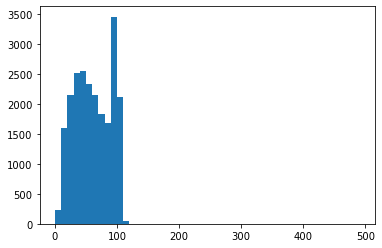

In [4]:
import matplotlib.pyplot as plt # 导入matplotlib
word_per_comment = [len(comment) for comment in X_train_tokenized_lst]
plt.hist(word_per_comment, bins = np.arange(0,500,10)) # 显示评论长度分布
plt.show()

In [5]:
from keras.preprocessing.sequence import pad_sequences 
max_comment_length = 100 # 设定评论输入长度为100，并填充默认值(如字数少于100)
X_train = pad_sequences(X_train_tokenized_lst, maxlen=max_comment_length)

### 7.4.2 构建包含词嵌入的SimpleRNN

In [ ]:
from keras.models import Sequential # 导入贯序模型
from keras.layers.embeddings import Embedding #导入词嵌入层
from keras.layers import Dense #导入全连接层
from keras.layers import SimpleRNN #导入SimpleRNN层
embedding_vecor_length = 60 # 设定词嵌入向量长度为60
rnn = Sequential() # 贯序模型
rnn.add(Embedding(dictionary_size, embedding_vecor_length, 
          input_length=max_comment_length)) # 加入词嵌入层
rnn.add(SimpleRNN(100)) # 加入SimpleRNN层
rnn.add(Dense(10, activation='relu')) # 加入全连接层
rnn.add(Dense(6, activation='softmax')) # 加入分类输出层
rnn.compile(loss='sparse_categorical_crossentropy', #损失函数
            optimizer='adam', # 优化器
            metrics=['acc']) # 评估指标
print(rnn.summary()) #打印网络模型                


In [ ]:
history = rnn.fit(X_train, y_train,
                                    validation_split = 0.3,
                                    epochs = 10,
                                    batch_size = 64)

## 7.6 用LSTM鉴定评论文本

In [ ]:
from keras.models import Sequential # 导入贯序模型
from keras.layers.embeddings import Embedding #导入词嵌入层
from keras.layers import Dense #导入全连接层
from keras.layers import LSTM #导入LSTM层
embedding_vecor_length = 60 # 设定词嵌入向量长度为60
lstm = Sequential() # 贯序模型
lstm.add(Embedding(dictionary_size, embedding_vecor_length, 
          input_length=max_comment_length)) # 加入词嵌入层
lstm.add(LSTM(100)) # 加入LSTM层
lstm.add(Dense(10, activation='relu')) # 加入全连接层
lstm.add(Dense(6, activation='softmax')) # 加入分类输出层
lstm.compile(loss='sparse_categorical_crossentropy', #损失函数
             optimizer = 'adam', # 优化器
             metrics = ['acc']) # 评估指标
history = rnn.fit(X_train, y_train, 
                    validation_split = 0.3,
                    epochs=10, 
                    batch_size=64)